# Question 2
### Parts A and B

In [1]:
"""Tic-Tac-Toe environment with both safe and random opponent"""
import random
from copy import deepcopy
random.seed(224)

class TicTacToe:
    def __init__(self, opponent):
        self.board = [[None, None, None], [None, None, None], [None, None, None]]
        starter = random.randint(0, 1)
        self.opponent = self.random_opponent if opponent == "random" else self.safe_opponent
        if starter == 0:
            self.opponent()

    def act(self, position):
        assert self.board[position[0]][position[1]] is None, "Invalid move"
        self.board[position[0]][position[1]] = "X"
        lis = [set(self.board[0]), set(self.board[1]), set(self.board[2]), set([self.board[i][i] for i in range(3)]), set([self.board[i][2-i] for i in range(3)])]
        lis.extend([{x, y, z} for x, y, z in zip(*self.board)])
        if {"X"} in lis:
            return 1
        self.opponent()
        lis = [set(self.board[0]), set(self.board[1]), set(self.board[2]), set([self.board[i][i] for i in range(3)]), set([self.board[i][2-i] for i in range(3)])]
        lis.extend([{x, y, z} for x, y, z in zip(*self.board)])
        if {"O"} in lis:
            return -1
        return 0

    def print_board(self):
        print(self.board)

    def pseudo_act_opponent(self, position):
        board = deepcopy(self.board)
        board[position[0]][position[1]] = "O"
        lis = [set(self.board[0]), set(self.board[1]), set(self.board[2]), set([self.board[i][i] for i in range(3)]), set([self.board[i][2-i] for i in range(3)])]
        lis.extend([{x, y, z} for x, y, z in zip(*self.board)])
        if {"O"} in lis:
            return 1
        return 0

    def pseudo_act_agent(self, position):
        board = deepcopy(self.board)
        board[position[0]][position[1]] = "X"
        lis = [set(self.board[0]), set(self.board[1]), set(self.board[2]), set([self.board[i][i] for i in range(3)]), set([self.board[i][2-i] for i in range(3)])]
        lis.extend([{x, y, z} for x, y, z in zip(*self.board)])
        if {"X"} in lis:
            return 1
        return 0

    def random_opponent(self):
        moves = [[i//3, i%3] for i in range(9) if self.board[i//3][i%3] is None]
        if len(moves) > 0:
            move = random.randint(0, len(moves)-1)
            move = moves[move]
            self.board[move[0]][move[1]] = "O"

    def safe_opponent(self):
        moves = [[i//3, i%3] for i in range(9) if self.board[i//3][i%3] is None]
        for i in moves:
            if self.pseudo_act_opponent(i):
                self.board[i[0]][i[1]] = "O"
                return
        for i in moves:
            if self.pseudo_act_agent(i):
                self.board[i[0]][i[1]] = "O"
                return
        if len(moves) > 0:
            move = random.randint(0, len(moves)-1)
            move = moves[move]
            self.board[move[0]][move[1]] = "O"

### Part C

In [2]:
"""Q-learning agent"""
from collections import defaultdict
class Agent:
    def __init__(self):
        self.action_values = defaultdict(int)

    def play_game(self, opponent):
        game = TicTacToe(opponent)
        while 1:
            moves = [[i//3, i%3] for i in range(9) if game.board[i//3][i%3] is None]
            action_values = [self.action_values[(tuple(tuple(i) for i in game.board), tuple(move))] for move in moves]
            reward = game.act(moves[action_values.index(max(action_values))])
            if reward != 0:
                return reward
            moves = [[i//3, i%3] for i in range(9) if game.board[i//3][i%3] is None]
            if len(moves) == 0:
                return 0

    def train(self, alpha, opponent):
        game = TicTacToe(opponent)
        while 1:
            moves = [[i//3, i%3] for i in range(9) if game.board[i//3][i%3] is None]
            action_values = [self.action_values[(tuple(tuple(i) for i in game.board), tuple(move))] for move in moves]

            state = deepcopy(game.board)
            epsilon = 0.4
            best_move = action_values.index(max(action_values))
            probs = [epsilon/len(moves) for _ in range(len(moves))]
            probs[best_move] += 1 - epsilon
            move = random.choices(list(range(len(moves))), probs)[0]
            reward = game.act(moves[move])

            all_moves = [[i//3, i%3] for i in range(9)]
            all_action_values = [self.action_values[(tuple(tuple(i) for i in game.board), tuple(action))] for action in all_moves]
            temp = self.action_values[(tuple(tuple(i) for i in state), tuple(moves[move]))]
            self.action_values[(tuple(tuple(i) for i in state), tuple(moves[move]))] = temp + alpha*(reward+max(all_action_values)-temp)

            if reward != 0:
                return
            if len(moves) <= 2:
                return

### Part C q1

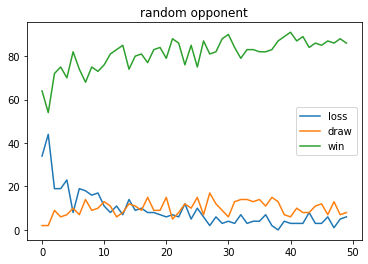

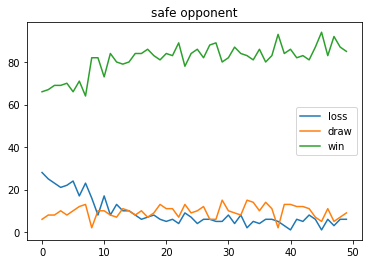

final wins against random opponent: 86
final wins against safe opponent: 85


In [3]:
import matplotlib.pyplot as plt
agent = Agent()

test_random = []
test_safe = []
for itr in range(50):
    for j in range(200):
        agent.train(1/(200*itr+j+1), "random")

    result = [0, 0, 0]
    for j in range(100):
        result[agent.play_game("random")+1] += 1
    test_random.append(result)

    result = [0, 0, 0]
    for j in range(100):
        result[agent.play_game("safe")+1] += 1
    test_safe.append(result)

plt.plot(list(range(50)), [x[0] for x in test_random], label="loss")
plt.plot(list(range(50)), [x[1] for x in test_random], label="draw")
plt.plot(list(range(50)), [x[2] for x in test_random], label="win")
plt.legend()
plt.title("random opponent")
plt.show()

plt.plot(list(range(50)), [x[0] for x in test_safe], label="loss")
plt.plot(list(range(50)), [x[1] for x in test_safe], label="draw")
plt.plot(list(range(50)), [x[2] for x in test_safe], label="win")
plt.legend()
plt.title("safe opponent")
plt.show()

print("final wins against random opponent:", test_random[-1][-1])
print("final wins against safe opponent:", test_safe[-1][-1])

### Part C q2

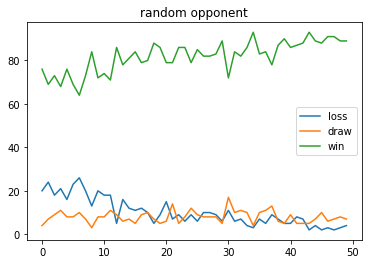

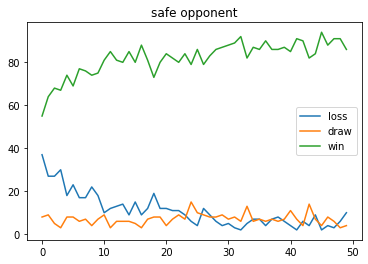

final wins against random opponent: 89
final wins against safe opponent: 86


In [4]:
agent = Agent()

test_random = []
test_safe = []
for itr in range(50):
    for j in range(200):
        agent.train(1/(200*itr+j+1), "safe")

    result = [0, 0, 0]
    for j in range(100):
        result[agent.play_game("random")+1] += 1
    test_random.append(result)

    result = [0, 0, 0]
    for j in range(100):
        result[agent.play_game("safe")+1] += 1
    test_safe.append(result)

plt.plot(list(range(50)), [x[0] for x in test_random], label="loss")
plt.plot(list(range(50)), [x[1] for x in test_random], label="draw")
plt.plot(list(range(50)), [x[2] for x in test_random], label="win")
plt.legend()
plt.title("random opponent")
plt.show()

plt.plot(list(range(50)), [x[0] for x in test_safe], label="loss")
plt.plot(list(range(50)), [x[1] for x in test_safe], label="draw")
plt.plot(list(range(50)), [x[2] for x in test_safe], label="win")
plt.legend()
plt.title("safe opponent")
plt.show()

print("final wins against random opponent:", test_random[-1][-1])
print("final wins against safe opponent:", test_safe[-1][-1])

### Part C q3

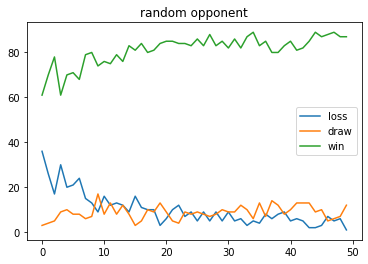

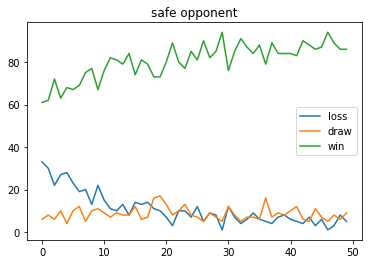

final wins against random opponent: 87
final wins against safe opponent: 86


In [5]:
agent = Agent()

test_random = []
test_safe = []
for itr in range(50):
    for j in range(200):
        choice = random.randint(0, 1)
        if choice == 0:
            agent.train(1/(200*itr+j+1), "safe")
        else:
            agent.train(1/(200*itr+j+1), "random")

    result = [0, 0, 0]
    for j in range(100):
        result[agent.play_game("random")+1] += 1
    test_random.append(result)

    result = [0, 0, 0]
    for j in range(100):
        result[agent.play_game("safe")+1] += 1
    test_safe.append(result)

plt.plot(list(range(50)), [x[0] for x in test_random], label="loss")
plt.plot(list(range(50)), [x[1] for x in test_random], label="draw")
plt.plot(list(range(50)), [x[2] for x in test_random], label="win")
plt.legend()
plt.title("random opponent")
plt.show()

plt.plot(list(range(50)), [x[0] for x in test_safe], label="loss")
plt.plot(list(range(50)), [x[1] for x in test_safe], label="draw")
plt.plot(list(range(50)), [x[2] for x in test_safe], label="win")
plt.legend()
plt.title("safe opponent")
plt.show()

print("final wins against random opponent:", test_random[-1][-1])
print("final wins against safe opponent:", test_safe[-1][-1])

### Part C q4
The best agent is the agent trained against the safe opponent. This can be seen as it is winning the maximum number of games against both random and safe opponents. This is because the safe opponent is the harder opponent. Thus it is difficult to win against the safe opponent. Thus the agent trained against the safe opponent is learning better strategies.

### Part C q5
No, the Q learning agents developed are not unbeatable against any possible opponent. This can be seen in the fact that even against the safe and random opponents, we are not winning all the games. Q learning has the drawback that it is not scalable to very large state-action spaces. Thus we can improve our Q learning agents by training them on more number of games or by using the concept of afterstates.